In [1]:
%matplotlib inline  

In [2]:
import pyspark_cassandra
from pyspark.sql import SQLContext
sql = SQLContext(sc)

In [3]:
tab = sc.cassandraTable("labor", "average_price_data_current")

In [4]:
apd = tab.toDF(sampleRatio=.1)

In [5]:
# looking at the price of peaches
peaches = apd[apd.item == "711414"]

In [6]:
peaches_per_location = peaches.select("area_name").groupBy("area_name").count()

In [7]:
ppl = peaches_per_location.toPandas()

In [8]:
ppl.set_index("area_name", inplace=True)

In [9]:
ppl

,count
area_name,
South urban,282
West urban,261
U.S. city average,279
Midwest urban,263
Northeast urban,261


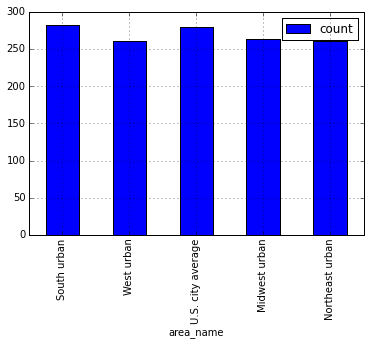

In [10]:
ppl.plot(kind="bar")